# Download the datasets

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [293]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from keras_preprocessing import image
from keras.callbacks import EarlyStopping

In [294]:
#Initialising the CNN
classifier = Sequential()

In [295]:
# Step1 - Convolution
# Input Layer/dimensions
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
classifier.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

In [296]:
# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
classifier.add(Convolution2D(64,3,3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [297]:
# step3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())

In [298]:
# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie dog or cat
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
# sigmoid helps in 0 1 classification

# Compiling the CNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [299]:
# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [300]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [301]:
training_set = train_datagen.flow_from_directory(
        'brain_tumor_dataset2/training_set',
        target_size=(64, 64),
        batch_size=5,
        class_mode='binary')

Found 191 images belonging to 2 classes.


In [302]:
test_set = test_datagen.flow_from_directory(
        'brain_tumor_dataset2/testing_set',
        target_size=(64, 64),
        batch_size=10,
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [307]:
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times
 
history=classifier.fit_generator(
    training_set,
    steps_per_epoch=5,
    epochs=50,
    validation_data=test_set,
    validation_steps=5
    #callbacks=[es]
)

score = classifier.evaluate(training_set)

Epoch 1/50
5/5 [==============================] - 0s 68ms/step - loss: 0.4861 - accuracy: 0.7200 - val_loss: 0.6466 - val_accuracy: 0.6600
Epoch 2/50
5/5 [==============================] - 0s 47ms/step - loss: 0.5870 - accuracy: 0.7600 - val_loss: 0.5714 - val_accuracy: 0.7000
Epoch 3/50
5/5 [==============================] - 0s 48ms/step - loss: 0.4031 - accuracy: 0.8800 - val_loss: 0.6608 - val_accuracy: 0.6400
Epoch 4/50
5/5 [==============================] - 0s 49ms/step - loss: 0.4674 - accuracy: 0.8400 - val_loss: 0.6961 - val_accuracy: 0.5800
Epoch 5/50
5/5 [==============================] - 0s 46ms/step - loss: 0.7728 - accuracy: 0.5714 - val_loss: 0.7449 - val_accuracy: 0.6200
Epoch 6/50
5/5 [==============================] - 0s 56ms/step - loss: 0.4799 - accuracy: 0.7600 - val_loss: 0.6167 - val_accuracy: 0.7000
Epoch 7/50
5/5 [==============================] - 0s 50ms/step - loss: 0.3704 - accuracy: 0.9200 - val_loss: 0.6854 - val_accuracy: 0.5800
Epoch 8/50
5/5 [===========

limit_output extension: Maximum message size of 10000 exceeded with 10177 characters

In [308]:
print('Test accuracy:', score[1]*100, '%')

Test accuracy: 81.15183115005493 %


In [309]:
test_image = image.load_img('brain_tumor_dataset2/single_prediction/Y32.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'
    
print('The prediction result is :',prediction)

1/1 [==============================] - 0s 24ms/step
The prediction result is : Yes


In [310]:
test_image = image.load_img('brain_tumor_dataset2/single_prediction/32 no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'No'
else:
    prediction = 'Yes'
    
print('The prediction result is :',prediction)

1/1 [==============================] - 0s 20ms/step
The prediction result is : No


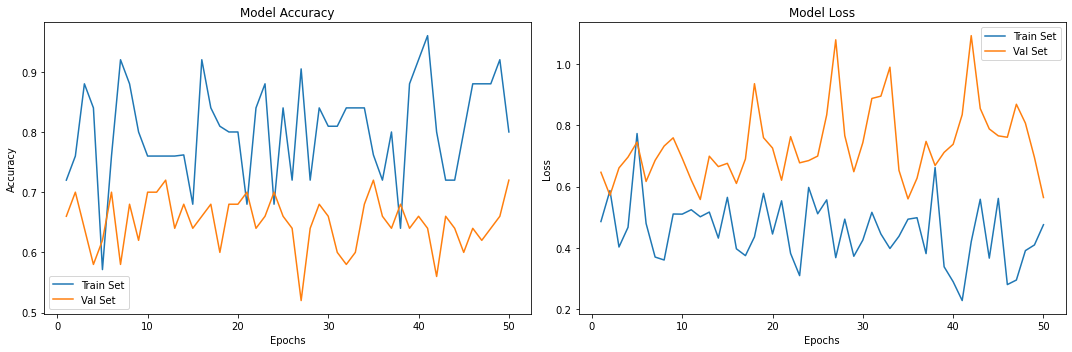

In [311]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()